In [12]:
import pandas as pd

DATA_PATH = "../data/processed/ethiopia_fi_unified_data_enriched.csv"
df = pd.read_csv(DATA_PATH)

df.shape



(43, 34)

In [2]:
model_df = df[
    (df["record_type"] == "observation") &
    (df["indicator_code"] == "ACC_OWNERSHIP") &
    (df["location"] == "national")
].copy()

model_df[["observation_date", "value_numeric"]]


,observation_date,value_numeric
0,2014-12-31,22.0
1,2017-12-31,35.0
2,2021-12-31,46.0
3,2021-12-31,56.0
4,2021-12-31,36.0
5,2024-11-29,49.0


In [3]:
model_df["observation_date"] = pd.to_datetime(model_df["observation_date"])
model_df = model_df.sort_values("observation_date")

model_df[["observation_date", "value_numeric"]]


,observation_date,value_numeric
0,2014-12-31,22.0
1,2017-12-31,35.0
2,2021-12-31,46.0
3,2021-12-31,56.0
4,2021-12-31,36.0
5,2024-11-29,49.0


In [4]:
model_df["year"] = model_df["observation_date"].dt.year
model_df["years_since_start"] = (
    model_df["year"] - model_df["year"].min()
)


In [5]:
train_df = model_df.iloc[:-1]
test_df = model_df.iloc[-1:]

X_train = train_df[["years_since_start"]]
y_train = train_df["value_numeric"]

X_test = test_df[["years_since_start"]]
y_test = test_df["value_numeric"]


In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [8]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

y_test.values[0], y_pred[0], mae


(np.float64(49.0), np.float64(56.20588235294119), 7.205882352941188)

In [10]:
future_X = pd.DataFrame(
    {"years_since_start": [years_since_start]}
)

future_pred = model.predict(future_X)

future_pred[0]


np.float64(62.82352941176471)

In [13]:
model_df[["year", "value_numeric"]]


,year,value_numeric
0,2014,22.0
1,2017,35.0
2,2021,46.0
3,2021,56.0
4,2021,36.0
5,2024,49.0


In [14]:
model.coef_, model.intercept_


(array([3.30882353]), np.float64(23.117647058823525))

In [15]:
y_test.values[0], y_pred[0], mae


(np.float64(49.0), np.float64(56.20588235294119), 7.205882352941188)

In [16]:
future_pred[0]


np.float64(62.82352941176471)

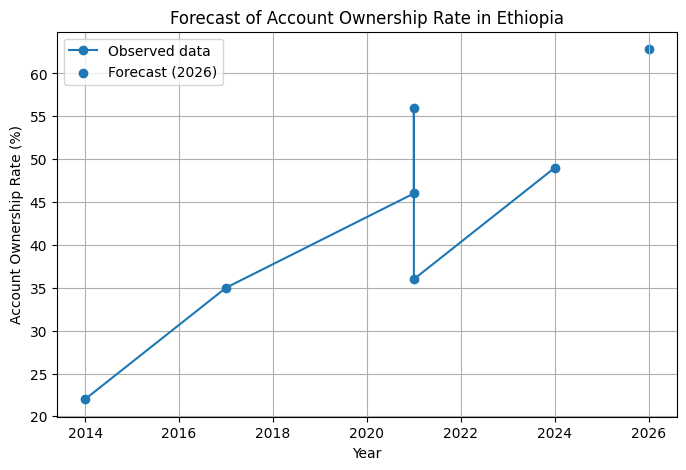

In [17]:
import matplotlib.pyplot as plt

# Historical data
years = model_df["year"]
values = model_df["value_numeric"]

# Plot observed values
plt.figure(figsize=(8, 5))
plt.plot(years, values, marker="o", linestyle="-", label="Observed data")

# Plot forecast point
plt.scatter(
    future_year,
    future_pred[0],
    label="Forecast (2026)",
)

# Labels and title
plt.xlabel("Year")
plt.ylabel("Account Ownership Rate (%)")
plt.title("Forecast of Account Ownership Rate in Ethiopia")
plt.legend()
plt.grid(True)

plt.show()
